## Описание проекта

Цель: разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров на основе данных фермера и данных ассоциации пастбищ "Экоферма", где будут приобретаться коровы  
Задачи: создать две прогнозные модели для отбора бурёнок в поголовье
1. Прогноз возможного удоя коровы (целевой признак Удой)
2. Рассчет вероятности получить вкусное молоко от коровы (целевой признак Вкус молока)  

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным

## Описание данных

### ferma_main.csv

Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент

* id — уникальный идентификатор коровы.  
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).  
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.  
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).  
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.  
* Порода — порода коровы.  
* Тип пастбища — ландшафт лугов, на которых паслась корова.  
* порода папы_быка — порода папы коровы.  
* Жирность,% — содержание жиров в молоке (в процентах).  
* Белок,% — содержание белков в молоке (в процентах).  
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).  
* Возраст — возраст коровы, бинарный признак (менее\_2\_лет, более\_2\_лет).

Признаки в датасете **ferma_main.csv**

* Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин,г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой,кг, Жирность,%, Белок,%, Вкус молока.

### ferma_dad.csv

Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера

* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

### cow_buy.csv

Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее\_2\_лет, более\_2\_лет).

## Загрузка данных

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
import scipy.stats as st
import numpy as np

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


В исходных данных все столбцы названы кириллицей, оформлены в разных стилях, в том числе, с заглавными буквами и без использования змеиного регистра. В датасете с именами пап меньше строк, чем в основном датасете с признаками. Есть столбцы с числовыми значениями, где следует изменить тип данных на float

In [9]:
ferma_main.columns = ['id', 'milk_yield', 'feed_energy', 'crude_protein', 'sugar-protein_ratio', 'breed', 'grazing', 'dads_breed', 'fats', 'proteins', 'milk_taste', 'age']
ferma_dad.columns = ['id', 'dads_name']
cow_buy.columns = ['breed', 'grazing', 'dads_breed', 'dads_name', 'fats', 'proteins', 'age']

##  Предобработка данных

### Обработка дубликатов

In [10]:
ferma_main[ferma_main.duplicated(keep=False)]

,id,milk_yield,feed_energy,crude_protein,sugar-protein_ratio,breed,grazing,dads_breed,fats,proteins,milk_taste,age
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


Найдены 5 строк-дубликатов строки 626 - их убираем из датасета

In [11]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

Теперь в датафреймах с именами пап и основном совпадает кол-во строк

In [12]:
ferma_main['grazing'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [13]:
ferma_main['grazing'] = ferma_main['grazing'].replace('Равнинные', 'Равнинное')
ferma_main['grazing'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [14]:
ferma_main['dads_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [15]:
ferma_main['dads_breed'] = ferma_main['dads_breed'].replace('Айдиалл', 'Айдиал')
ferma_main['dads_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Найдены неявные дубликаты в столбцах с типом пастбища и породы папы - устранены

In [16]:
cow_buy[cow_buy.duplicated(keep=False)]

,breed,grazing,dads_breed,dads_name,fats,proteins,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Найдены дубликаты в датафрейме с коровами на продажу, их тоже убираем

In [17]:
cow_buy = cow_buy.drop_duplicates()
cow_buy.duplicated().sum()

0

### Изменение типов данных

In [18]:
columns_main = ['feed_energy', 'sugar-protein_ratio', 'fats', 'proteins']
for column in columns_main:
    ferma_main[column] = ferma_main[column].str.replace(',', '.')
    ferma_main[column] = pd.to_numeric(ferma_main[column])
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield           629 non-null    int64  
 2   feed_energy          629 non-null    float64
 3   crude_protein        629 non-null    int64  
 4   sugar-protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   grazing              629 non-null    object 
 7   dads_breed           629 non-null    object 
 8   fats                 629 non-null    float64
 9   proteins             629 non-null    float64
 10  milk_taste           629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


In [19]:
columns_buy = ['fats', 'proteins']
for column in columns_buy:
    cow_buy[column] = cow_buy[column].str.replace(',', '.')
    cow_buy[column] = pd.to_numeric(cow_buy[column])
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   breed       16 non-null     object 
 1   grazing     16 non-null     object 
 2   dads_breed  16 non-null     object 
 3   dads_name   16 non-null     object 
 4   fats        16 non-null     float64
 5   proteins    16 non-null     float64
 6   age         16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


Изменили тип данных в числовых столбцах в датасетах основном и с покупкой

## Исследовательский анализ данных

In [20]:
ferma_main.head()

,id,milk_yield,feed_energy,crude_protein,sugar-protein_ratio,breed,grazing,dads_breed,fats,proteins,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [21]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
milk_yield,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
feed_energy,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
crude_protein,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
sugar-protein_ratio,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
fats,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
proteins,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


### Количественные признаки

#### mikl_yield (удой)

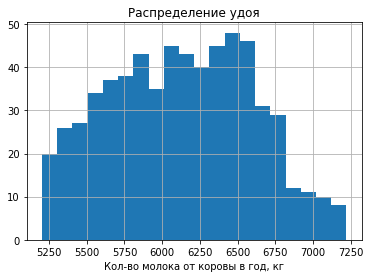

In [47]:
ferma_main['milk_yield'].hist(bins=20)
#plt.xlim(5000, 7500)
plt.title('Распределение удоя')
plt.xlabel('Кол-во молока от коровы в год, кг')
plt.show()

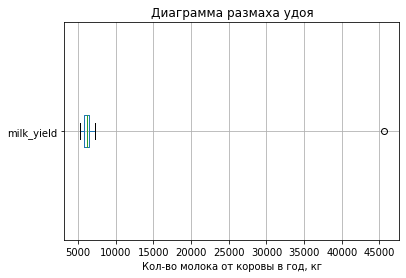

In [23]:
ferma_main.boxplot('milk_yield', vert=False)
plt.title('Диаграмма размаха удоя')
plt.xlabel('Кол-во молока от коровы в год, кг')
plt.show()

По диаграмме размаха и по описанию видим, что есть аномальное значение в 45616 кг - убираем его

In [24]:
ferma_main = ferma_main.query('milk_yield != 45616')
ferma_main['milk_yield'].sort_values(ascending=False).head()

70     7222
135    7207
296    7201
294    7197
593    7174
Name: milk_yield, dtype: int64

#### feed_energy (ЭКЕ)

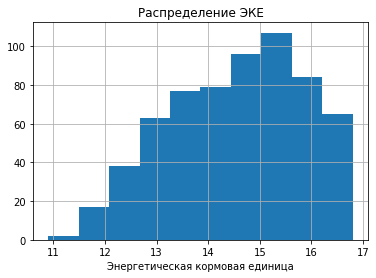

In [25]:
ferma_main['feed_energy'].hist(bins=10)
plt.title('Распределение ЭКЕ')
plt.xlabel('Энергетическая кормовая единица')
plt.show()

#### crude_protein (сырой протеин)

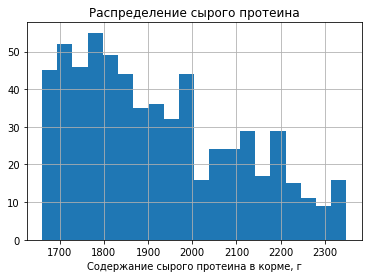

In [26]:
ferma_main['crude_protein'].hist(bins=20)
plt.title('Распределение сырого протеина')
plt.xlabel('Содержание сырого протеина в корме, г')
plt.show()

#### sugar-protein_ratio (СПО)

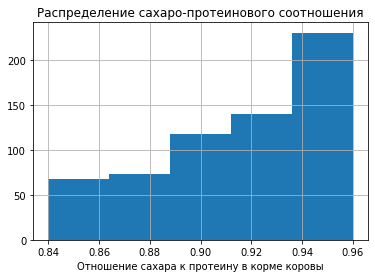

In [27]:
ferma_main['sugar-protein_ratio'].hist(bins=5)
plt.title('Распределение cахаро-протеинового соотношения')
plt.xlabel('Отношение сахара к протеину в корме коровы')
plt.show()

#### fats (жирность)

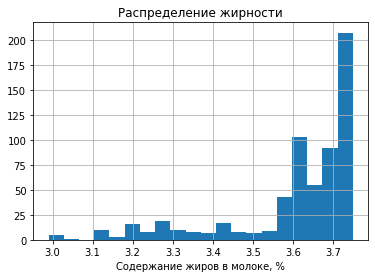

In [28]:
ferma_main['fats'].hist(bins=20)
plt.title('Распределение жирности')
plt.xlabel('Содержание жиров в молоке, %')
plt.show()

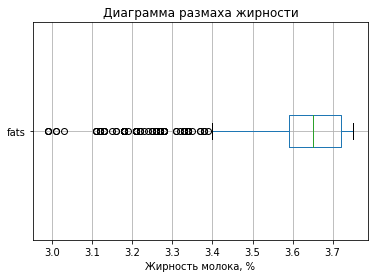

In [29]:
ferma_main.boxplot('fats', vert=False)
plt.title('Диаграмма размаха жирности')
plt.xlabel('Жирность молока, %')
plt.show()

График не имеет нормального распределения, есть много аномалий ниже 3,4%

#### proteins (белок)

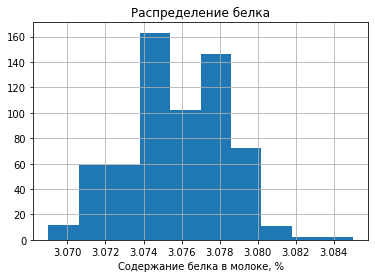

In [30]:
ferma_main['proteins'].hist(bins=10)
plt.title('Распределение белка')
plt.xlabel('Содержание белка в молоке, %')
plt.show()

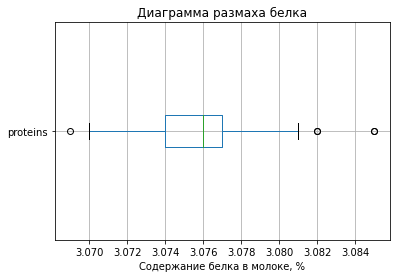

In [31]:
ferma_main.boxplot('proteins', vert=False)
plt.title('Диаграмма размаха белка')
plt.xlabel('Содержание белка в молоке, %')
plt.show()

Есть выбросы как снизу, так и сверху. Их немного и они несильно выделяются (не так как в признаке удоя)

### Категориальные признаки

#### breed (порода)

In [32]:
ferma_main['breed'].value_counts()

Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: breed, dtype: int64

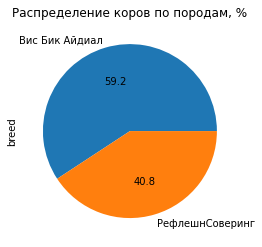

In [33]:
ferma_main['breed'].value_counts().plot(kind='pie', title='Распределение коров по породам, %', autopct='%.1f')
plt.show()

#### grazing (пастбище)

In [34]:
ferma_main['grazing'].value_counts()

Холмистое    350
Равнинное    278
Name: grazing, dtype: int64

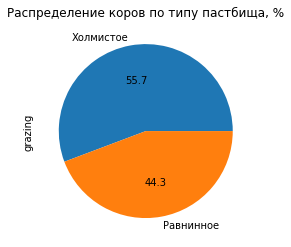

In [35]:
ferma_main['grazing'].value_counts().plot(kind='pie', title='Распределение коров по типу пастбища, %', autopct='%.1f')
plt.show()

#### dads_breed (порода папы)

In [36]:
ferma_main['dads_breed'].value_counts()

Айдиал     317
Соверин    311
Name: dads_breed, dtype: int64

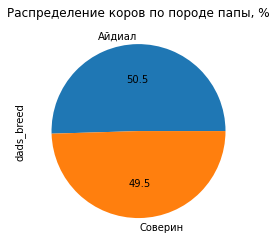

In [37]:
ferma_main['dads_breed'].value_counts().plot(kind='pie', title='Распределение коров по породе папы, %', autopct='%.1f')
plt.show()

#### milk_taste (вкус молока)

In [38]:
ferma_main['milk_taste'].value_counts()

вкусно       370
не вкусно    258
Name: milk_taste, dtype: int64

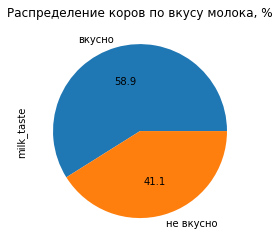

In [39]:
ferma_main['milk_taste'].value_counts().plot(kind='pie', title='Распределение коров по вкусу молока, %', autopct='%.1f')
plt.show()

#### age (возраст)

In [40]:
ferma_main['age'].value_counts()

более_2_лет    518
менее_2_лет    110
Name: age, dtype: int64

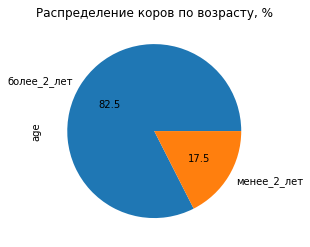

In [41]:
ferma_main['age'].value_counts().plot(kind='pie', title='Распределение коров по возрасту, %', autopct='%.1f')
plt.show()

### Вывод

* Большинство количественных признаков распределено нормально (жирность, СПО, сырой протеин - исключения)
* Было убрано одно аномальное значение в признаке удоя
* Распределение категориальных признаков близко к 1:1, выделяется только признак возраст, где значение более 2 лет имеет значительный перевес в выборке

## Корреляционный анализ

### Взаимосвязь между признаками

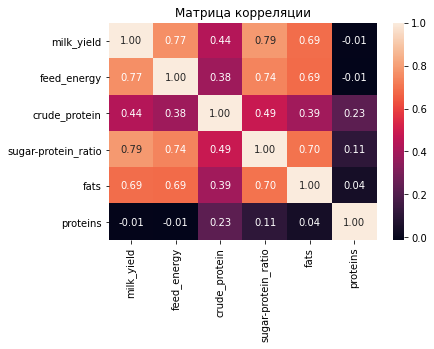

In [42]:
sns.heatmap(ferma_main.drop('id', axis=1).corr(method='spearman'), annot=True, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

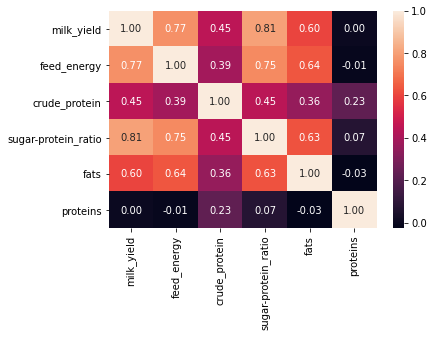

In [45]:
sns.heatmap(ferma_main.drop('id', axis=1).corr(), annot=True, fmt='.2f') #для сравнения
plt.show()

Судя по тепловой карте, самая сильная связь у целевого признака удой с СПО и ЭКЕ

### Построение диаграмм рассеяния 

In [125]:
quant_list = ['feed_energy', 'crude_protein', 'sugar-protein_ratio', 'fats', 'proteins'] #список количественных признаков
categ_list = ['breed', 'grazing', 'dads_breed', 'milk_taste', 'age'] #список категориальных признаков

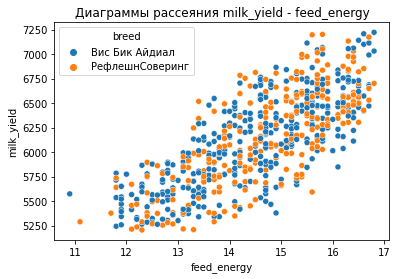

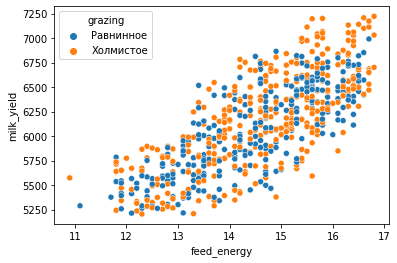

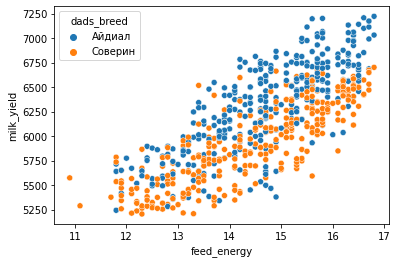

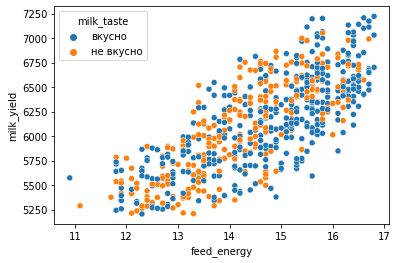

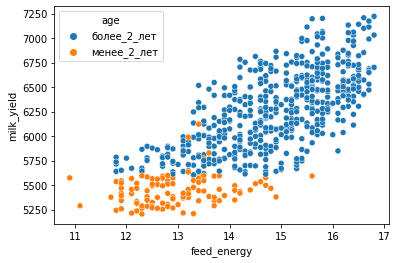

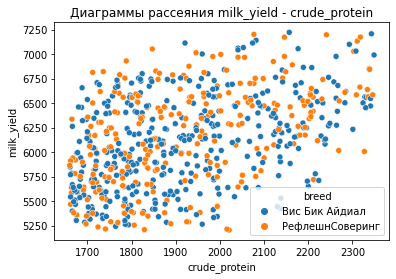

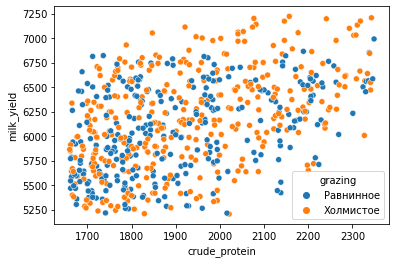

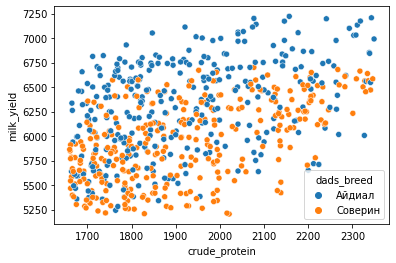

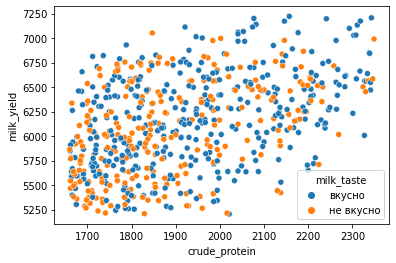

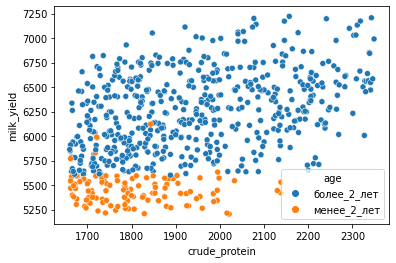

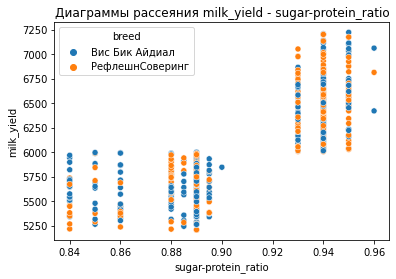

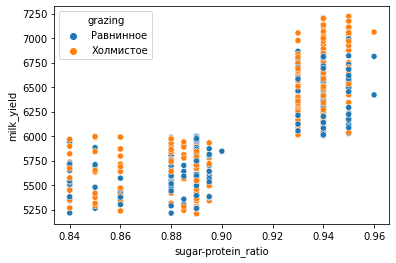

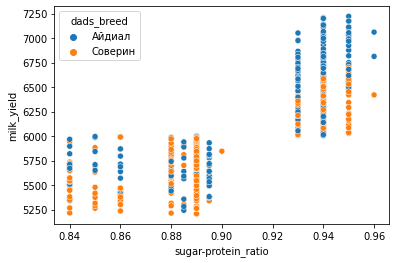

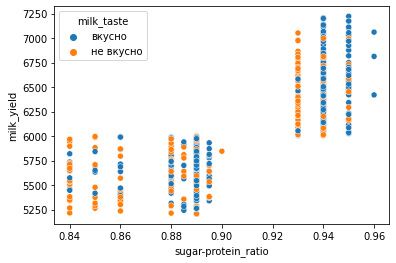

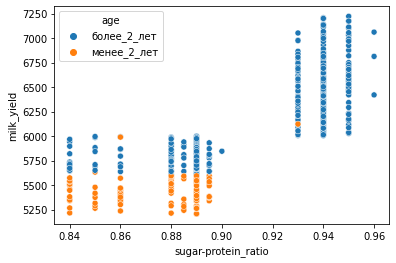

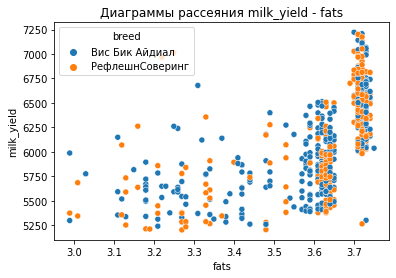

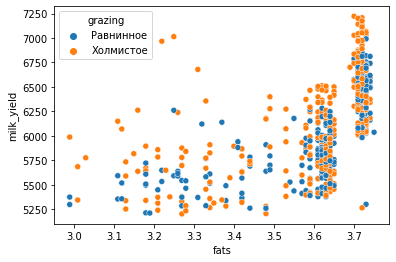

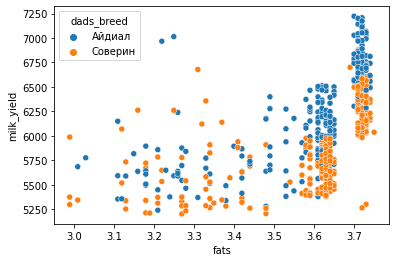

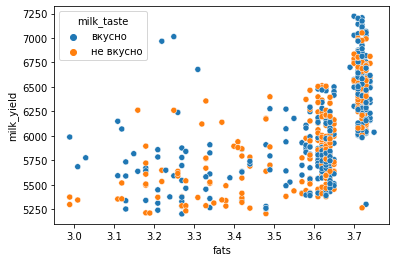

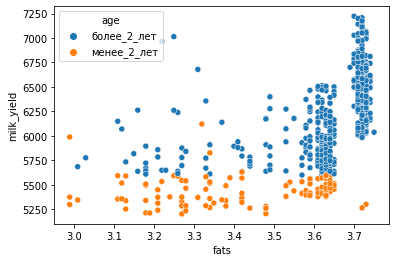

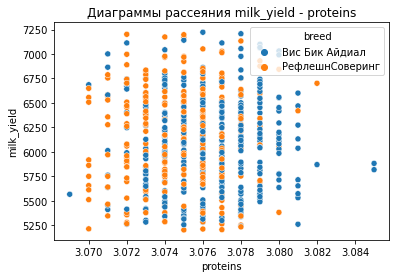

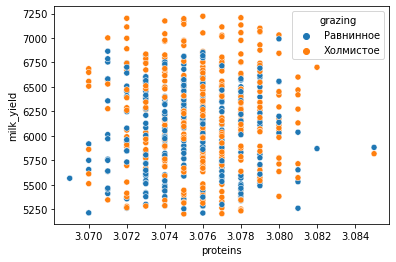

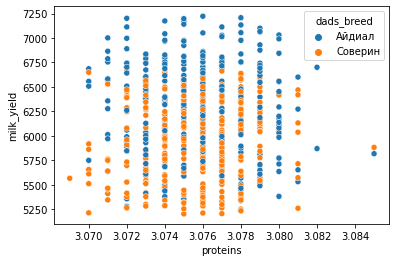

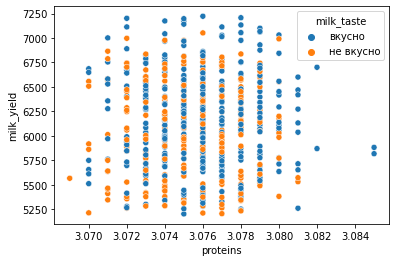

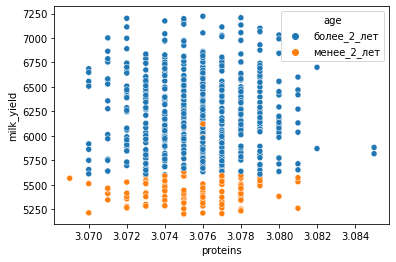

In [126]:
for feature_q in quant_list:
    plt.title(f'Диаграммы рассеяния milk_yield - {feature_q}')
    for feature_c in categ_list:
        sns.scatterplot(data=ferma_main, x=feature_q, y='milk_yield', hue=feature_c)
        plt.show()

### Вывод

* Наблюдается высокая сила связи у целевого признака с входными признаками ЭКЕ (0,77) И СПО (0,79), но диаграмма рассеяния удой-СПО выглядит нелинейно
* Отсутствует корреляция у целевого признака с признаком белка в молоке
* Обращаем внимание, что у породы Соверинг жирность молока выше, чем у породы Айдиал, а содержание белка наоборот, в остальных признаках породы распределены равномерно
* Корова с породой папы Айдиал дает в среднем молока больше, нежели породы Соверин
* Корова возрастом более 2 лет дает молока больше, чем корова возрастом менее 2 лет
* Пасущиеся на холмистых ландшафтах коровы в лидерах по максимальному кол-ву удоя в год
* Коров возрастом менее 2 лет кормят С-П отношением менее 0,91
* Мультиколлинеарности между входными признаками не наблюдаем

## Обучение модели линейной регрессии

### Модель №1

Для первой модели используем целевой признак удой, убираем остальные характеристики молока: белок, жирность, вкус молока. Также убираем столбец id

In [127]:
ml_1 = ferma_main.drop(['id', 'fats', 'proteins', 'milk_taste'], axis=1)
ml_1.head()

,milk_yield,feed_energy,crude_protein,sugar-protein_ratio,breed,grazing,dads_breed,age
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


#### Разбивка данных

In [128]:
RANDOM_STATE = 42

X = ml_1.drop('milk_yield', axis=1)
y = ml_1['milk_yield']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#### Подготовка данных

In [129]:
num_col_names = ['feed_energy', 'crude_protein', 'sugar-protein_ratio']
cat_col_names  = ['breed', 'grazing', 'dads_breed', 'age']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#### Обучение и оценка модели

In [130]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2_1 = r2_score(y_test, predictions)
mse_1 = mean_squared_error(y_test, predictions)
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
mae_1 = mean_absolute_error(y_test, predictions)
print(f'Коэффициент детерминации R^2 модели №1: {r2_1}')

Коэффициент детерминации R^2 модели №1: 0.7844078173416967


#### Анализ остатков

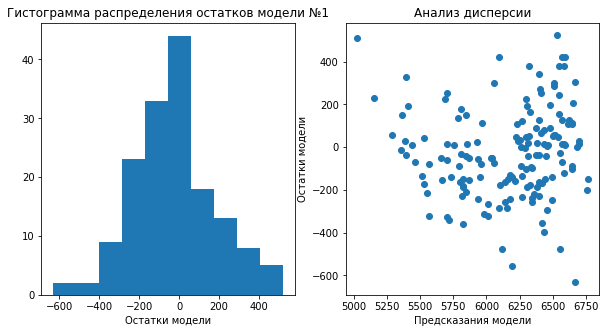

In [131]:
residuals_1 = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1)
axes[0].set_title('Гистограмма распределения остатков модели №1')
axes[0].set_xlabel('Остатки модели')

axes[1].scatter(predictions, residuals_1)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки модели')
plt.show()

#### Вывод

* По гистограмме распределения видим что остатки распределены нормально, с небольшим смещением влево. Модель немного завышает прогнозные значения
* По диаграмме рассеивания видим, что разброс дисперсии непостоянен на малых значениях удоя
* R2 модели №1 - 0,784

### Модель №2

Для второй модели целевой признак остается тот же - удой. Преобразовываем признак СПО в категориальный бинарный признак с граничным значением 0,92 и признак ЭКЕ в ЭКЕ^2, чтобы устранить нелинейность

In [132]:
ml_2 = ferma_main
ml_2['spr_cat'] = ml_2['sugar-protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
display(ml_2['spr_cat'].value_counts())
ml_2['feed_energy_sq'] = ml_2['feed_energy'] ** 2
ml_2 = ml_2.drop(['id', 'fats', 'proteins', 'milk_taste', 'sugar-protein_ratio', 'feed_energy'], axis=1)
ml_2.head()

1    370
0    258
Name: spr_cat, dtype: int64

,milk_yield,crude_protein,breed,grazing,dads_breed,age,spr_cat,feed_energy_sq
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


#### Разбивка данных

In [133]:
X = ml_2.drop('milk_yield', axis=1)
y = ml_2['milk_yield']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#### Подготовка данных

In [134]:
num_col_names = ['crude_protein', 'feed_energy_sq']
cat_col_names  = ['breed', 'grazing', 'dads_breed', 'age', 'spr_cat']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#### Обучение и оценка модели

In [135]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions = model_lr_2.predict(X_test)
r2_2 = r2_score(y_test, predictions)
mse_2 = mean_squared_error(y_test, predictions)
rmse_2 = mean_squared_error(y_test, predictions, squared=False)
mae_2 = mean_absolute_error(y_test, predictions)
print(f'Коэффициент детерминации R^2 модели №2: {r2_2}')

Коэффициент детерминации R^2 модели №2: 0.8180879926867501


#### Анализ остатков

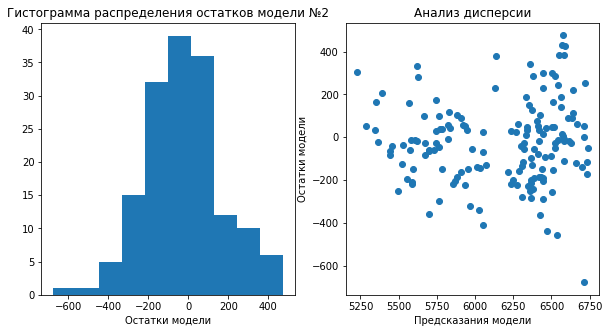

In [136]:
residuals_2 = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков модели №2')
axes[0].set_xlabel('Остатки модели')

axes[1].scatter(predictions, residuals_2)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки модели')
plt.show()

#### Вывод

* Остатки распределены так же, как у модели №1, со смещением влево
* Значение метрики R2 модели №2 выше, и составляет 0,818

### Модель №3

Для третьей модели добавляем еще один категориальный признак - имя папы и проделываем преобразования как в модели №2

In [137]:
ml_3 = ferma_main.merge(ferma_dad, on='id')
ml_3.head()

,id,milk_yield,feed_energy,crude_protein,sugar-protein_ratio,breed,grazing,dads_breed,fats,proteins,milk_taste,age,spr_cat,feed_energy_sq,dads_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [138]:
ml_3['spr_cat'] = ml_3['sugar-protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
ml_3['feed_energy_sq'] = ml_3['feed_energy'] ** 2
ml_3 = ml_3.drop(['id', 'fats', 'proteins', 'milk_taste', 'sugar-protein_ratio', 'feed_energy'], axis=1)
ml_3.head()

,milk_yield,crude_protein,breed,grazing,dads_breed,age,spr_cat,feed_energy_sq,dads_name
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64,Буйный
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84,Соловчик
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00,Барин
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76,Буйный
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84,Барин


#### Разбивка данных

In [139]:
X = ml_3.drop('milk_yield', axis=1)
y = ml_3['milk_yield']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#### Подготовка данных

In [140]:
num_col_names = ['crude_protein', 'feed_energy_sq']
cat_col_names  = ['breed', 'grazing', 'dads_breed', 'age', 'spr_cat', 'dads_name']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#### Обучение и оценка модели

In [141]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions = model_lr_3.predict(X_test)
r2_3 = r2_score(y_test, predictions)
mse_3 = mean_squared_error(y_test, predictions)
rmse_3 = mean_squared_error(y_test, predictions, squared=False)
mae_3 = mean_absolute_error(y_test, predictions)
print(f'Коэффициент детерминации R^2 модели №3: {r2_3}')

Коэффициент детерминации R^2 модели №3: 0.8247542745210407


#### Анализ остатков

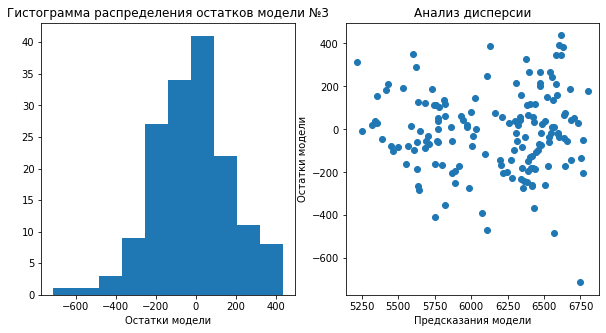

In [142]:
residuals_3 = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3)
axes[0].set_title('Гистограмма распределения остатков модели №3')
axes[0].set_xlabel('Остатки модели')

axes[1].scatter(predictions, residuals_3)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки модели')
plt.show()

#### Вывод

* Остатки распределены нормально, график симметричен, смещение самое минимальное среди остальных моделей
* Метрика R2 модели №3 имеет наибольшее значение среди остальных моделей - 0,825

### Сравнение моделей

In [143]:
ml_compared = pd.DataFrame({
    'model': ['model_1', 'model_2', 'model_3'],
    'r2': [r2_1, r2_2, r2_3],
    'residuals': [residuals_1.mean(), residuals_2.mean(), residuals_3.mean()],
    'mse': [mse_1, mse_2, mse_3],
    'rmse': [rmse_1, rmse_2, rmse_3],
    'mae': [mae_1, mae_2, mae_3]
})
ml_compared

,model,r2,residuals,mse,rmse,mae
0,model_1,0.784408,-25.373286,43887.015010,209.492279,164.241945
1,model_2,0.818088,-24.372798,37030.911311,192.434174,149.039652
2,model_3,0.824754,-15.201522,35673.889886,188.875329,146.163024


Как видим по всем метрикам наиболее точной является модель №3. Рассчитаем ее доверительный интервал:

In [ ]:
st.norm.interval(0.95, loc=predictions.mean(), scale=st.sem(predictions)) 

(6092.340075854288, 6221.3750700583805)

### Прогноз удоя

Для того, чтобы спрогнозировать удой нужно добавить недостающие признаки в датасет с коровами на продажу

In [145]:
cow_buy_ml = cow_buy.copy()
cow_buy_ml.head()

,breed,grazing,dads_breed,dads_name,fats,proteins,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [146]:
features_add = ferma_main[['feed_energy', 'crude_protein', 'sugar-protein_ratio']].mean() * 1.05 #признаки, которые добавляем в датасет cow_buy
features_add

feed_energy              15.276162
crude_protein          2019.947532
sugar-protein_ratio       0.958744
dtype: float64

#### Подготовка данных

In [ ]:
cow_buy_ml['feed_energy_sq'] = features_add['feed_energy'] ** 2
cow_buy_ml['crude_protein'] = features_add['crude_protein']
cow_buy_ml['spr_cat'] = 1 #так как 0,958744 > 0.92
cow_buy_ml['grazing'] = cow_buy_ml['grazing'].replace({'холмистое': 'Холмистое', 'равнинное': 'Равнинное'}) 
cow_buy_ml = cow_buy_ml.drop(['fats', 'proteins'], axis=1)
cow_buy_ml.head()

,breed,grazing,dads_breed,dads_name,age,feed_energy_sq,crude_protein,spr_cat
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,233.361138,2019.947532,1


In [148]:
num_col_names = ['crude_protein', 'feed_energy_sq']
cat_col_names  = ['breed', 'grazing', 'dads_breed', 'age', 'spr_cat', 'dads_name']

X_test_ohe = encoder.transform(cow_buy_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_test_scaled = scaler.transform(cow_buy_ml[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_test.head()

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик,crude_protein,feed_energy_sq
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.517384,0.542248
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.517384,0.542248
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.517384,0.542248
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.517384,0.542248
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.517384,0.542248


#### Предсказание модели

In [149]:
pred = model_lr_3.predict(X_test)
cow_buy['pred_milk_yield'] = pred
cow_buy

,breed,grazing,dads_breed,dads_name,fats,proteins,age,pred_milk_yield
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.380218
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6344.707860
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6617.928926


#### Вывод

* Лучшая модель оказалась - модель №3, где совершили все преобразования нелинейных зависимостей и добавили еще один категориальный признак. Ее метрики:
    * MSE - 35673.889886
    * RSME - 188.875329
    * MAE - 146.163024
    * 95% доверительный интервал - (6092.340075854288, 6221.3750700583805)
* Получили прогноз удоя предложенных коров. Все коровы из списка удовлетворяют требованию не менее 6000 кг удоя в год

## Обучение модели логистической регрессии

### Модель №4

Для решения задачи по отбору коров на вкус молока используем логистическую регрессию с целевым признаком вкус молока

In [150]:
ml_4 = ferma_main.merge(ferma_dad, on='id')
ml_4 = ml_4.drop(['id', 'milk_yield', 'spr_cat', 'feed_energy_sq'], axis=1) #убираем ненужные признаки
ml_4['milk_taste'] = ml_4['milk_taste'].replace({'вкусно': 1, 'не вкусно': 0})
ml_4.head()

,feed_energy,crude_protein,sugar-protein_ratio,breed,grazing,dads_breed,fats,proteins,milk_taste,age,dads_name
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,Буйный
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,Соловчик
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,Барин
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,Буйный
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,Барин


#### Разбивка данных

In [151]:
X = ml_4.drop('milk_taste', axis=1)
y = ml_4['milk_taste']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#### Подготовка данных

In [152]:
num_col_names = ['feed_energy', 'crude_protein', 'sugar-protein_ratio', 'fats', 'proteins']
cat_col_names  = ['breed', 'grazing', 'dads_breed', 'age', 'dads_name']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#### Обучение и оценка модели

In [153]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy_4 = accuracy_score(y_test, predictions)
precision_4 = precision_score(y_test, predictions)
recall_4 = recall_score(y_test, predictions)

print(f'Accuracy: {accuracy_4};\nPrecision: {precision_4};\nRecall: {recall_4}')

Accuracy: 0.6114649681528662;
Precision: 0.6097560975609756;
Recall: 0.8522727272727273


#### Матрица ошибок

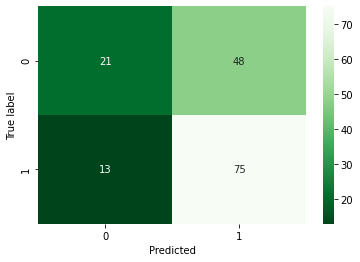

In [154]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

#### Вывод

* Модель ошибочно предсказывает, что молоко вкусное 48 раз, а что невкусное всего 13 раз
* Точность присвоения класса 1 составляет 0,61 - что достаточно мало
* Полнота составляет 0,85, что для нашей задачи не имеет значения, нужно минимизировать ошибки первого рода

### Анализ модели логистической регрессии

При покупке коров критичнее ошибка первого рода, так как молоко должно быть вкусным -> важнее метрика precision

#### Подбор порога принадлежности

In [155]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
                    columns = ['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

new_data = pd.DataFrame(columns = ['threshold', 'recall', 'precision'])

thresholds = [round(i, 2) for i in np.linspace(0.25, 0.84, num=20, endpoint=False)]

columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda a: 1 if a >= i else 0)
for i in thresholds:
    r = recall_score(data['y_valid'], data['y_pred_'+str(i)])
    p = precision_score(data['y_valid'], data['y_pred_'+str(i)], zero_division=0)
    new_data.loc[len(new_data.index)] = [i, r, p]
new_data

,threshold,recall,precision
0,0.25,1.000000,0.564103
1,0.28,1.000000,0.567742
2,0.31,0.988636,0.568627
3,0.34,0.977273,0.565789
4,0.37,0.977273,0.577181
5,0.40,0.965909,0.594406
6,0.43,0.943182,0.605839
7,0.46,0.909091,0.601504
8,0.49,0.863636,0.612903
9,0.52,0.829545,0.623932


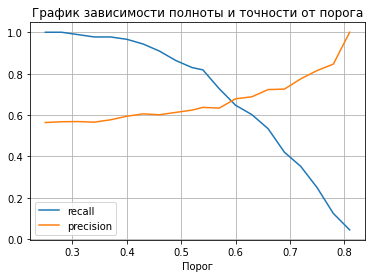

In [156]:
new_data.plot(x='threshold', grid=True)
plt.title('График зависимости полноты и точности от порога')
plt.xlabel('Порог')
plt.show()

Для того чтобы свести критичную ошибку к нулю, нужно брать порог со значением 0,81, но при этом значение recall составит 0,045, что плохо, поэтому чтобы сильно не занижать значение полноты, возьмем пороговое значение 0,7

In [158]:
threshold_ml = 0.7

predictions_threshold = y_proba > threshold_ml

new_accuracy_4 = accuracy_score(y_test, predictions_threshold)
new_precision_4 = precision_score(y_test, predictions_threshold)
new_recall_4 = recall_score(y_test, predictions_threshold)

print(f'_________Было_______\nAccuracy: {accuracy_4};\nPrecision: {precision_4};\nRecall: {recall_4}')
print(f'_________Стало_______\nAccuracy: {new_accuracy_4};\nPrecision: {new_precision_4};\nRecall: {new_recall_4}')

_________Было_______
Accuracy: 0.6114649681528662;
Precision: 0.6097560975609756;
Recall: 0.8522727272727273
_________Стало_______
Accuracy: 0.5987261146496815;
Precision: 0.7777777777777778;
Recall: 0.3977272727272727


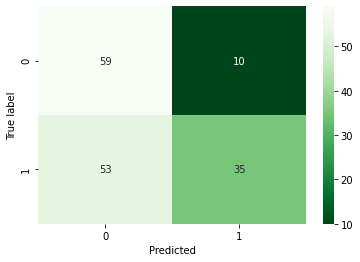

In [159]:
cm = confusion_matrix(y_test, predictions_threshold)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

#### Вывод

* Был выбран порог принадлежности - 0,7
* Метрика accuracy практически не изменилась, наша целевая метрика выросла с 0,61 до 0,78, метрика полноты упала с 0,85 до 0,4
* Благодаря этим манипуляциям удалось уменьшить ошибку перовго рода с 48 до 10
* Точность модели оставляет желать лучшего, поэтому ее необходимо улучшить либо новыми входными признаками, либо увеличением выборки

### Прогноз вкуса молока

In [160]:
cow_buy_ml_2 = cow_buy.copy()
cow_buy_ml_2['feed_energy'] = features_add['feed_energy']
cow_buy_ml_2['crude_protein'] = features_add['crude_protein']
cow_buy_ml_2['sugar-protein_ratio'] = features_add['sugar-protein_ratio']
cow_buy_ml_2['grazing'] = cow_buy_ml_2['grazing'].replace({'холмистое': 'Холмистое', 'равнинное': 'Равнинное'}) #на всякий случай, не знаю, повлияет ли это на что-то
cow_buy_ml_2 = cow_buy_ml_2.drop(['pred_milk_yield'], axis=1)
cow_buy_ml_2.head()

,breed,grazing,dads_breed,dads_name,fats,proteins,age,feed_energy,crude_protein,sugar-protein_ratio
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


#### Подготовка данных

In [161]:
X_test_ohe = encoder.transform(cow_buy_ml_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_test_scaled = scaler.transform(cow_buy_ml_2[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#### Получение прогноза

In [162]:
y_proba = clf.predict_proba(X_test)[:, 1]
predictions_taste = y_proba > threshold_ml

In [163]:
cow_buy['pred_milk_taste'] = predictions_taste
cow_buy

,breed,grazing,dads_breed,dads_name,fats,proteins,age,pred_milk_yield,pred_milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,True
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,True
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,False
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377,False
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,False
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.380218,False
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,True
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,True
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6344.707860,False
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6617.928926,False


#### Вывод

* 6 коров могут быть предложены фермеру к покупке, при этом риск, что молоко окажется невкусное 1 к 3,5 

## Итоговые выводы

В данном проекте были разработаны 4 модели МО, из них 3 линейной регрессии, и 1 - логистической. В задаче про удой коровы была выбрана, на основе метрик, наиболее точная модель из 3 и по ней спрогнозированы значения удоя коров, предложенных фермеру к покупке. В задаче логистической регрессии был спрогнозирован вкус молока по имеющимся данным фермера. Следующие коровы рекомендованы к покупке:

In [166]:
cow_buy.query('pred_milk_taste==True')

,breed,grazing,dads_breed,dads_name,fats,proteins,age,pred_milk_yield,pred_milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,True
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,True
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,True
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,True
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,6127.474742,True
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6344.707860,True


На этапе загрузки и предобработки данных:
* найдены 5 строк-дубликатов
* названия столбцов приведены к единому виду (зря я их на аглийский переводил, только сложности добавило)
* преобразованы типы данных в числовых столбцах в датасетах основном и с покупкой
* найдены и устранены неявные дубликаты в столбцах с типом пастбища и породы папы - устранены
* удалены дубликаты в датафрейме с коровами на продажу

На этапе исследовательского анализа:
* убрали аномальное значение в признаке удой
* большинство количественных признаков распределено нормально (жирность, СПО, сырой протеин - исключения)
* распределение категориальных признаков близко к 1:1, выделяется только признак возраст, где значение более 2 лет имеет значительный перевес в выборке

На этапе корреляционного анализа:
* отмечена высокая сила связи у целевого признака с входными признаками ЭКЕ (0,77) И СПО (0,79), но диаграмма рассеяния удой-СПО выглядит нелинейно
* отсутствует корреляция у целевого признака (удой) с признаком белка в молоке
* породы Соверинг жирность молока выше, чем у породы Айдиал, а содержание белка наоборот, в остальных признаках породы распределены равномерно
* корова с породой папы Айдиал дает в среднем молока больше, нежели породы Соверин
* корова возрастом более 2 лет дает молока больше, чем корова возрастом менее 2 лет
* пасущиеся на холмистых ландшафтах коровы в лидерах по максимальному кол-ву удоя в год
* коров возрастом менее 2 лет кормят С-П отношением менее 0,91
* Мультиколлинеарности между входными признаками не наблюдаем

На этапе решения линейной регресии:
* обучены 3 модели, оценены их метрики, проанализированы их остатки
* выбрана лучшая модель - ей оказалась модель №3, где совершили все преобразования нелинейных зависимостей и добавили еще один категориальный признак. Ее метрики:
    * MSE - 35673.889886
    * RSME - 188.875329
    * MAE - 146.163024
    * 95% доверительный интервал - (6092.340075854288, 6221.3750700583805)
* для улучшения регрессионнной модели можно увеличить выборку или добавить новые входные признаки, которые могут влиять на целевой
* получили прогноз удоя предложенных коров. Все коровы из списка удовлетворяют требованию не менее 6000 кг удоя в год

На этапе решения логистической регрессии:
* обучили и доработали модель предсказания вкуса молока
* для данной задачи важна метрика precision, так как фермеру, в первую очередь, важно чтобы молоко было вкусным
* удалось уменьшить ошибку перовго рода с 48 до 10, подобрав оптимальный порог принадлежности, однако точность модели все равно осталась на достаточно низком уровне из-за нехватки входящих признаков
* спрогнозировали вкусное молоко у 6 коров